Analyste Challenge Mobilité INP 2024

In [2]:
#Dataset de 2024 
import pandas as pd

df = pd.read_excel('Data INP/2024_Challengemobilite2024_6-4-2024_13_28.xlsx')
df

,N°Obs,1. Vous êtes ? *,2. Lieu de travail *,3. Type de votre entité,4. Nom de votre école,5. Nom de votre laboratoire ou de votre plateforme,6. Nom de votre direction,7. Nom de votre école ? *,8. Quelle est votre commune de résidence ? *,9. Pied,...,42. CLE,43. DATE_SAISIE,44. Date de dernière modification,45. Date de dernier enregistrement,46. Temps de saisie,47. Langue,48. Origine,49. Appareil utilisé pour la saisie,50. Progression,53. Dernière question saisie
0,1,"Personnel (Enseignant, Enseignant-Chercheur, B...",GreEn-ER,Ecole,Ense3,NaN,NaN,NaN,Grenoble,NaN,...,HRE2-WM5D,30/04/2024 09:52:32,NaN,30/04/2024 09:57:07,275.229395,FR,Direct,PC,Terminé,NaN
1,2,"Personnel (Enseignant, Enseignant-Chercheur, B...",Campus - Saint Martin d'Hères,Laboratoire / plateforme,NaN,SIMAP,NaN,NaN,CROLLES,NaN,...,8HB8-HCGJ,02/05/2024 10:48:49,NaN,02/05/2024 10:51:12,142.918376,FR,Direct,PC,Terminé,NaN
2,3,"Personnel (Enseignant, Enseignant-Chercheur, B...",Valence,Ecole,Esisar,NaN,NaN,NaN,Valence,0.0,...,SU33-HR5D,02/05/2024 11:44:42,NaN,02/05/2024 11:46:59,137.496843,FR,Direct,PC,Terminé,NaN
3,4,"Personnel (Enseignant, Enseignant-Chercheur, B...",Valence,Ecole,Esisar,NaN,NaN,NaN,Valence,1.0,...,G8SR-3G4D,02/05/2024 11:44:33,NaN,02/05/2024 11:48:30,237.119356,FR,Direct,PC,Terminé,NaN
4,5,"Personnel (Enseignant, Enseignant-Chercheur, B...",Valence,Ecole,Esisar,NaN,NaN,NaN,Valence,3.0,...,2NZV-YKL9,02/05/2024 11:51:44,NaN,02/05/2024 11:55:09,205.064550,FR,Direct,PC,Terminé,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,420,"Personnel (Enseignant, Enseignant-Chercheur, B...",Viallet,Service d'établissement,NaN,NaN,Direction de la communication,NaN,Le Versoud,0.0,...,E6RL-VK5P,05/06/2024 16:32:32,NaN,05/06/2024 16:35:12,160.034036,FR,Direct,PC,Terminé,NaN
420,421,"Personnel (Enseignant, Enseignant-Chercheur, B...",Valence,Ecole,Esisar,NaN,NaN,NaN,Malissard,NaN,...,F9KL-LWFM,05/06/2024 22:12:42,NaN,05/06/2024 22:16:41,239.778994,FR,Direct,PC,Terminé,NaN
421,422,Etudiant(e),NaN,NaN,NaN,NaN,NaN,Prépa des INP,Saint-Martin-d’Heres,0.0,...,6AJF-4FU8,07/06/2024 19:41:14,NaN,07/06/2024 19:44:16,181.420503,FR,Direct,Smartphone,Terminé,NaN
422,423,Etudiant(e),NaN,NaN,NaN,NaN,NaN,Prépa des INP,38700 Corenc,NaN,...,6RME-W7EC,09/06/2024 22:23:45,NaN,09/06/2024 22:40:16,991.245533,FR,Direct,PC,Terminé,NaN


In [3]:
# Informations générales sur le DataFrame
print("\nInformations générales :")
print(df.info())

# Statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives :")
print(df.iloc[:, 15:27].describe())

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

#Le typage est bon / présence de NaN mais gardées pour les besoins d'analyse / présence de valeur 0.0: elles seron transformées en NaN pour ne pas
#fausser les calculs / Possible présence de valeurs aberrantes, elles seront traitées plus bas. 





Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 50 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   N°Obs                                                                                                                 424 non-null    int64  
 1   1. Vous êtes ?  *                                                                                                     424 non-null    object 
 2   2. Lieu de travail *                                                                                                  359 non-null    object 
 3   3. Type de votre entité                                                                                               359 non-nul

In [6]:

# Lignes contenant uniquement des NaN ou None
rows_all_null = df.isnull().all(axis=1)

print("Lignes avec uniquement des valeurs NaN ou None :")
print(df[rows_all_null])

# lignes entièrement nulles
if rows_all_null.any():
    print("\nIl existe des lignes avec uniquement des NaN.")
else:
    print("\nAucune ligne avec uniquement des NaN.")

Lignes avec uniquement des valeurs NaN ou None :
Empty DataFrame
Columns: [N°Obs, 1. Vous êtes ?  *, 2. Lieu de travail *, 3. Type de votre entité, 4. Nom de votre école, 5. Nom de votre laboratoire ou de votre plateforme, 6. Nom de votre direction, 7. Nom de votre école ?  *, 8. Quelle est votre commune de résidence ?  *, 9. Pied, 10. Trotinette, 11. Vélo, 12. Bus / Tram, 13. Train, 14. Covoiturage, 15. Télétravail (distance NON parcourue aujourd'hui), 16. Voiture solo, 17. Autres, 18. Combien de jour télétravaillez-vous par semaine ?, 19. Quel(s) jour de la semaine ?, 20. Pied, 21. Trotinette ou vélo, 22. Trotinette ou vélo électrique, 23. Tram, 24. Bus, 25. Train, 26. Covoiturage, 27. Moto / Scooter, 28. Voiture électrique, 29. Voiture hybride rechargeable, 30. Voiture à combustible, 31. Autre, 32. Vous covoiturez avec :, 33. Vous covoiturez avec qui, 34. Autre, 35. Si vous utilisez un véhicule à combustible (auto / moto) avec quelle énergie fonctionne-t'il ?, 36. Puissance fiscale 

In [8]:
# Les colonnes contenant uniquement des valeurs nulles
empty_columns = df.columns[df.isnull().all()]

print("Colonnes vides (entièrement nulles) :")
print(empty_columns.tolist())

# Vérifier colonnes vides
if not empty_columns.empty:
    print("\nIl existe des colonnes vides dans le DataFrame.")
else:
    print("\nAucune colonne vide dans le DataFrame.")


#Deux colonnes à supprimer


Colonnes vides (entièrement nulles) :
['44. Date de dernière modification', '53. Dernière question saisie']

Il existe des colonnes vides dans le DataFrame.


In [10]:
# Vérifier l'unicité de chque ligne avec le code CLE (un par personne) # Vérifier si tous les éléments d'une colonne sont uniques
column_name = '42. CLE'

# Vérifier si chaque cellule est unique
if df[column_name].is_unique:
    print(f"Toutes les valeurs de la colonne '{column_name}' sont uniques.")
else:
    print(f"La colonne '{column_name}' contient des doublons.")

#On peut donc considérer que chaque ligne correspond à un répondant 

Toutes les valeurs de la colonne '42. CLE' sont uniques.


In [12]:
# Colonnes à supprimer
columns_to_delete = ["44. Date de dernière modification", "53. Dernière question saisie"]

# Suppression
df = df.drop(columns=columns_to_delete)


In [14]:
# Il y a deux parties sur le dataset une dédiée à la journée challenge et l'autre au trajet de la vie quotidienne.
# Nous travaillons sur la deuxième partie dans un premier temps.
df.iloc[:, 20:32]  
df1_cleaned=df.iloc[:, 20:32]
df1_cleaned

,20. Pied,21. Trotinette ou vélo,22. Trotinette ou vélo électrique,23. Tram,24. Bus,25. Train,26. Covoiturage,27. Moto / Scooter,28. Voiture électrique,29. Voiture hybride rechargeable,30. Voiture à combustible,31. Autre
0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,NaN,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Remplacement des valeurs 0.0 par des NaN
import numpy as np
df1_cleaned.replace(0, np.nan, inplace=True)
df1_cleaned
print(df1_cleaned.describe())

          20. Pied  21. Trotinette ou vélo  22. Trotinette ou vélo électrique  \
count   107.000000              169.000000                          22.000000   
mean     23.383178                5.248521                           6.136364   
std     222.176865                3.573682                           4.039041   
min      -1.000000                1.000000                           1.000000   
25%       1.000000                3.000000                           4.250000   
50%       1.000000                4.000000                           5.000000   
75%       2.000000                7.000000                           8.500000   
max    2300.000000               20.000000                          15.000000   

        23. Tram      24. Bus   25. Train  26. Covoiturage  \
count  93.000000    41.000000   46.000000        30.000000   
mean    5.494624   117.926829   26.608696        19.066667   
std     4.302738   685.549538   20.545319        25.492302   
min     1.000000    -1

In [17]:
# Traitement des valeurs aberrantes avec recalcul de la médiane après suppression des valeurs pour remplacer les valeurs
#aberrantes. Nous choisissons cette méthode pour préserver les réponses des usagers.
for col in df1_cleaned.columns:
    if df1_cleaned[col].notna().sum() > 0:  # Vérifie si la colonne contient des valeurs valides
        filtered_values = df1_cleaned[col].dropna()

        if not filtered_values.empty:
            Q1 = filtered_values.quantile(0.25)
            Q3 = filtered_values.quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identification des valeurs aberrantes dans la colonne entière
            outliers_mask = (df1_cleaned[col] < lower_bound) | (df1_cleaned[col] > upper_bound)

            # Création d'un sous-ensemble sans les valeurs aberrantes
            inlier_values = filtered_values[(filtered_values >= lower_bound) & (filtered_values <= upper_bound)]

            if not inlier_values.empty:
                # Calcul de la médiane sans les valeurs aberrantes
                median_value = inlier_values.median()

                # Remplacement des outliers par cette nouvelle médiane
                df1_cleaned.loc[outliers_mask, col] = median_value
print(df1_cleaned.describe())

         20. Pied  21. Trotinette ou vélo  22. Trotinette ou vélo électrique  \
count  107.000000              169.000000                          22.000000   
mean     1.355140                4.644970                           5.681818   
std      0.618158                2.457615                           3.523883   
min      1.000000                1.000000                           1.000000   
25%      1.000000                3.000000                           4.250000   
50%      1.000000                4.000000                           5.000000   
75%      2.000000                6.000000                           6.750000   
max      3.000000               12.000000                          14.000000   

        23. Tram    24. Bus  25. Train  26. Covoiturage  27. Moto / Scooter  \
count  93.000000  41.000000  46.000000        30.000000            3.000000   
mean    4.387097  10.731707  23.152174        13.300000           21.000000   
std     2.162086  10.730854  13.094049    

In [18]:
#Calcul de la colonne Occurences (nombre d'usagers d'un mode de transport), de Distance Totale (km) (Cumul des distances
#réalisées sur un mode de transport), et de Distance Moyenne (km) (Distance moyenne réalisée sur un mode de transport)

comptage_mode_transport_E = df1_cleaned.count()
comptage_mode_transport_2024 = comptage_mode_transport_E.reset_index()
comptage_mode_transport_2024.columns = ['Mode de Transport', 'Occurrences']
comptage_mode_transport_2024['Mode de Transport'] = comptage_mode_transport_2024['Mode de Transport'].str.replace(r'^\d+\.\s*', '', regex=True)
somme_mode_transport = df1_cleaned.fillna(0).sum()
comptage_mode_transport_2024['Distance Totale (km)'] = somme_mode_transport.values
comptage_mode_transport_2024['Distance Moyenne (km)'] = (
    comptage_mode_transport_2024['Distance Totale (km)'] /
    comptage_mode_transport_2024['Occurrences']
)
comptage_mode_transport_2024


,Mode de Transport,Occurrences,Distance Totale (km),Distance Moyenne (km)
0,Pied,107,145.0,1.355140
1,Trotinette ou vélo,169,785.0,4.644970
2,Trotinette ou vélo électrique,22,125.0,5.681818
3,Tram,93,408.0,4.387097
4,Bus,41,440.0,10.731707
5,Train,46,1065.0,23.152174
6,Covoiturage,30,399.0,13.300000
7,Moto / Scooter,3,63.0,21.000000
8,Voiture électrique,8,148.0,18.500000
9,Voiture hybride rechargeable,5,11.0,2.200000


In [19]:
# Calcul de la proportion des occurrences en pourcentage
comptage_mode_transport_2024['Proportion Occurrences (%)'] = (
    comptage_mode_transport_2024['Occurrences'] / comptage_mode_transport_2024['Occurrences'].sum() * 100
)

# Calcul de la proportion des distances totales en pourcentage
comptage_mode_transport_2024['Proportion Distance Totale (%)'] = (
    comptage_mode_transport_2024['Distance Totale (km)'] / comptage_mode_transport_2024['Distance Totale (km)'].sum() * 100
)

comptage_mode_transport_2024

,Mode de Transport,Occurrences,Distance Totale (km),Distance Moyenne (km),Proportion Occurrences (%),Proportion Distance Totale (%)
0,Pied,107,145.0,1.355140,18.166384,3.450738
1,Trotinette ou vélo,169,785.0,4.644970,28.692699,18.681580
2,Trotinette ou vélo électrique,22,125.0,5.681818,3.735144,2.974774
3,Tram,93,408.0,4.387097,15.789474,9.709662
4,Bus,41,440.0,10.731707,6.960951,10.471204
5,Train,46,1065.0,23.152174,7.809847,25.345074
6,Covoiturage,30,399.0,13.300000,5.093379,9.495478
7,Moto / Scooter,3,63.0,21.000000,0.509338,1.499286
8,Voiture électrique,8,148.0,18.500000,1.358234,3.522132
9,Voiture hybride rechargeable,5,11.0,2.200000,0.848896,0.261780


In [24]:
#Renommage des colonnes pour préciser l'année des données

comptage_mode_transport_2024 = comptage_mode_transport_2024.rename(
    columns={col: col + ' 2024' for col in comptage_mode_transport_2024.columns if col != 'Mode de Transport'}
)
comptage_mode_transport_2024

,Mode de Transport,Occurrences 2024,Distance Totale (km) 2024,Distance Moyenne (km) 2024,Proportion Occurrences (%) 2024,Proportion Distance Totale (%) 2024
0,Pied,107,145.0,1.355140,18.166384,3.450738
1,Trotinette ou vélo,169,785.0,4.644970,28.692699,18.681580
2,Trotinette ou vélo électrique,22,125.0,5.681818,3.735144,2.974774
3,Tram,93,408.0,4.387097,15.789474,9.709662
4,Bus,41,440.0,10.731707,6.960951,10.471204
5,Train,46,1065.0,23.152174,7.809847,25.345074
6,Covoiturage,30,399.0,13.300000,5.093379,9.495478
7,Moto / Scooter,3,63.0,21.000000,0.509338,1.499286
8,Voiture électrique,8,148.0,18.500000,1.358234,3.522132
9,Voiture hybride rechargeable,5,11.0,2.200000,0.848896,0.261780


In [26]:
#export des colonnes nécessaires pour les les visualisations 1, 2 et 3 (voir data synthèse)

colonnes_a_conserver = ['Mode de Transport', 'Distance Moyenne (km) 2024', 'Proportion Occurrences (%) 2024', 'Proportion Distance Totale (%) 2024']
df_reduit = comptage_mode_transport_2024[colonnes_a_conserver]

# Exportation vers un fichier CSV
df_reduit.to_csv('INP2024Final.csv', index=False)

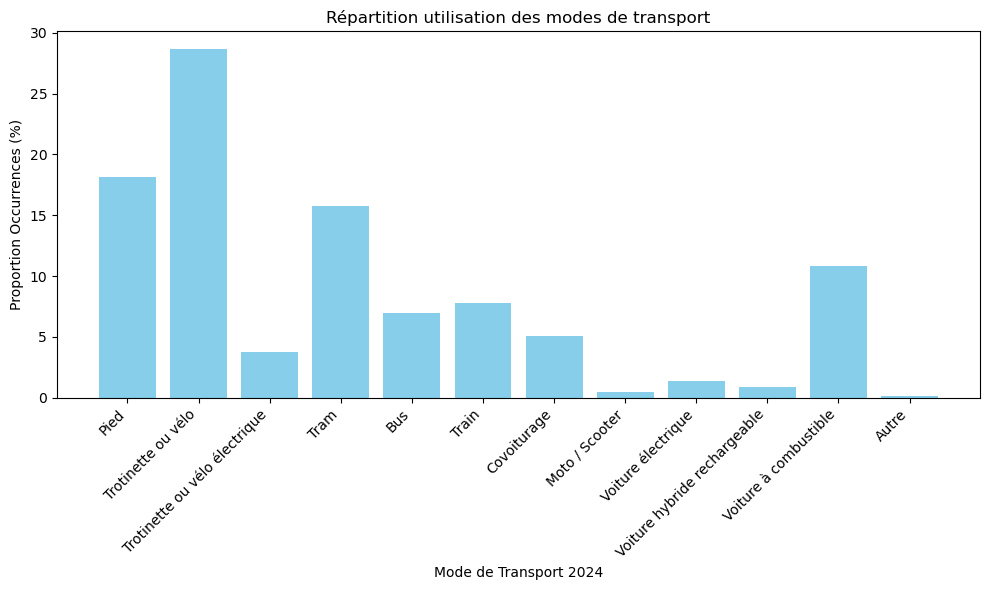

In [28]:
#Histogramme des modes de transport les plus utilisés
import pandas as pd
import matplotlib.pyplot as plt


# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(comptage_mode_transport_2024['Mode de Transport'], comptage_mode_transport_2024['Proportion Occurrences (%) 2024'], color='skyblue')
plt.xlabel('Mode de Transport 2024')
plt.ylabel('Proportion Occurrences (%)')
plt.title('Répartition utilisation des modes de transport')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

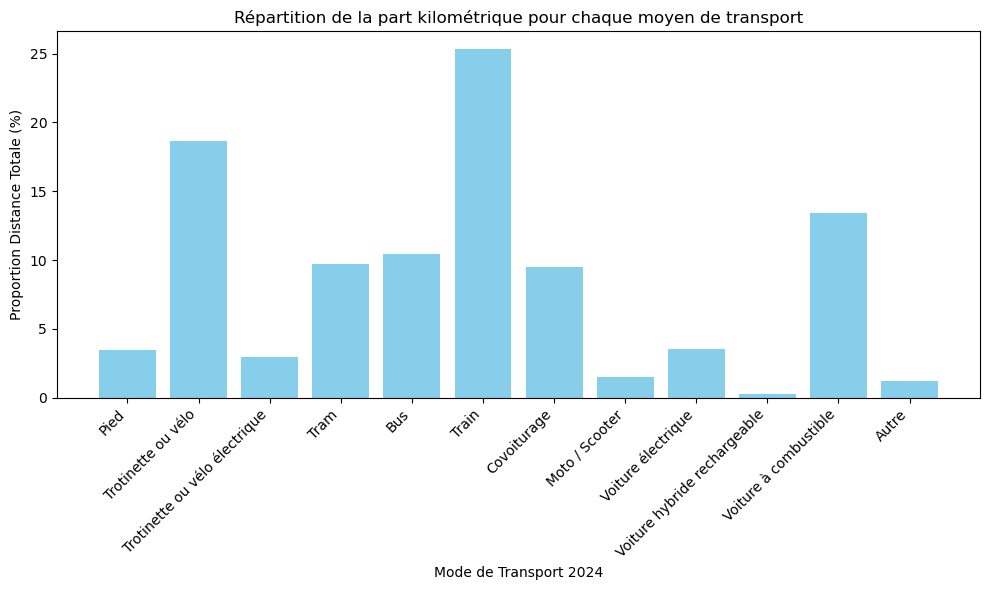

In [30]:
#Représentation de la part du kilométrage total (tous modes de transport confondus) associé à chaque moyen de transport.
import pandas as pd
import matplotlib.pyplot as plt


# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(comptage_mode_transport_2024['Mode de Transport'], comptage_mode_transport_2024['Proportion Distance Totale (%) 2024'], color='skyblue')
plt.xlabel('Mode de Transport 2024')
plt.ylabel('Proportion Distance Totale (%)')
plt.title('Répartition de la part kilométrique pour chaque moyen de transport')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

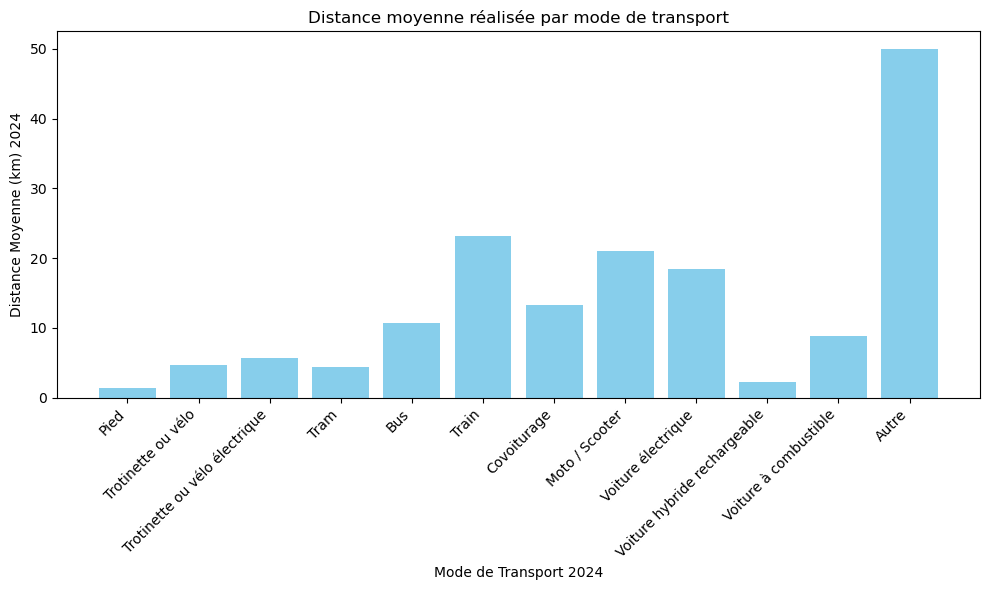

In [32]:
#Regardons si la distance parcourue par un usager sur son trajet quotidien a une influence sur le choix du ou des modes de transport
import pandas as pd
import matplotlib.pyplot as plt


# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(comptage_mode_transport_2024['Mode de Transport'], comptage_mode_transport_2024['Distance Moyenne (km) 2024'], color='skyblue')
plt.xlabel('Mode de Transport 2024')
plt.ylabel('Distance Moyenne (km) 2024')
plt.title('Distance moyenne réalisée par mode de transport')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
#Classement des modes de transport utilisés par type de trajet 
dfanalyse = df.iloc[:, 20:32].fillna(0.0)
dfanalyse

,20. Pied,21. Trotinette ou vélo,22. Trotinette ou vélo électrique,23. Tram,24. Bus,25. Train,26. Covoiturage,27. Moto / Scooter,28. Voiture électrique,29. Voiture hybride rechargeable,30. Voiture à combustible,31. Autre
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Calcul de la distance totale parcourue par un usager sur son trajet type
dfanalyse['Distance totale du trajet'] = dfanalyse.sum(axis=1)
count_zero_distance = len(dfanalyse[dfanalyse['Distance totale du trajet'] == 0])
count_zero_distance

20

In [38]:
dfanalyse = dfanalyse[dfanalyse['Distance totale du trajet'] != 0]
dfanalyse

,20. Pied,21. Trotinette ou vélo,22. Trotinette ou vélo électrique,23. Tram,24. Bus,25. Train,26. Covoiturage,27. Moto / Scooter,28. Voiture électrique,29. Voiture hybride rechargeable,30. Voiture à combustible,31. Autre,Distance totale du trajet
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,40.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
420,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
421,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
422,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [40]:
# Definition des catégories de distance 
def categorize_distance(distance):
    if distance <= 2:
        return "Très courte distance"
    elif 2 < distance <= 5:
        return "Courte distance"
    elif 5 < distance <= 10:
        return "Distance moyenne"
    elif 10 < distance <= 20:
        return "Longue distance"
    else:
        return "Très longue distance"

# Create a new column with the distance category
dfanalyse['Type de trajet'] = dfanalyse['Distance totale du trajet'].apply(categorize_distance)

dfanalyse
dfanalyse.to_excel('INP2024Matrice.xlsx', index=False)

C:\Users\33648\AppData\Local\Temp\ipykernel_7496\885076473.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanalyse['Type de trajet'] = dfanalyse['Distance totale du trajet'].apply(categorize_distance)


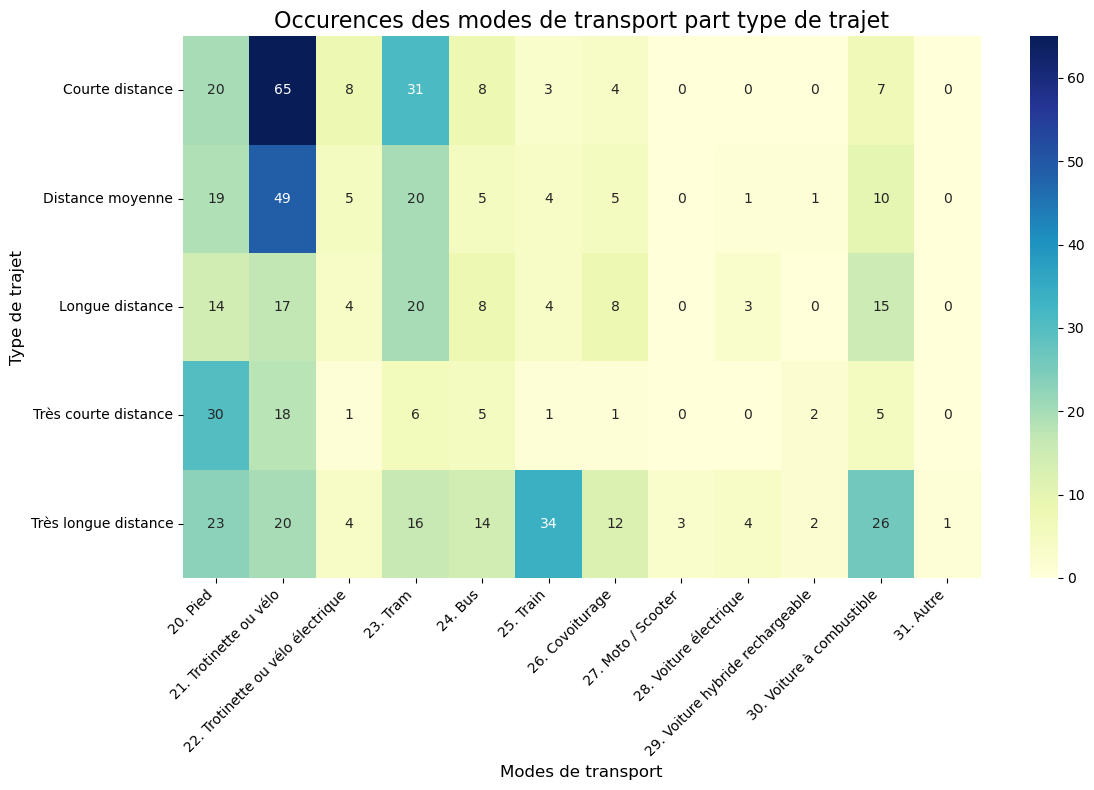

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

colonnes_gardees = dfanalyse.drop(columns=['Distance totale du trajet', 'Type de trajet'])

# Regroupage par 'Type de trajet' et comptage des occurrences (valeurs non égales à 0 ) pour chaque mode de transport
occurrences_transport = dfanalyse.groupby('Type de trajet').apply(lambda group: (group[colonnes_gardees.columns] > 0).sum())

# Visualisation heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(occurrences_transport, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Occurences des modes de transport part type de trajet", fontsize=16)
plt.ylabel("Type de trajet", fontsize=12)
plt.xlabel("Modes de transport", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

On constate que les mobilités douces sont utilisées pour tous les types de distance. Le train et la voiture surtout pour les
longues distances. On peut estimer que les moyens utilisés pour les mobilités douces sont suffisement importants pour inciter
les habitants à les utiliser pour toutes les distances. Pas d'évolution notable par rapport aux années précédentes. On peut conclure que les mobilités douces sont naturellement destinées aux courtes distances, mais elles peuvent être élargies aux distances plus lointaines si les infrastructures de la ville sont développées. Comme cela semble être le cas à Grenoble.